In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

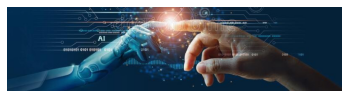

In [5]:
img=plt.imread("/content/image_for_compression.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
type(img)
#Computer read image as nd array of pixels of image

numpy.ndarray

In [10]:
print(img.shape)#(row,column,channels)
print(img.size)

(200, 800, 3)
480000


In [11]:
w,h,d=img.shape
image_array=img.reshape(w*h,d)
print(image_array.shape)

(160000, 3)


In [12]:
#Normalize image_array in the range of (0,1)
image_array=image_array/255

###Now,we will take the subsets of pixels to train.

In [14]:
from numpy import random
from sklearn.utils import shuffle
image_array_sample=shuffle(image_array,random_state=1)[:1000]
image_array_sample.size
#Here 3000 is 3(RGB)*1000

3000

In [28]:
Kmeans=KMeans(n_clusters=13,random_state=1)
Kmeans.fit(image_array_sample)

KMeans(n_clusters=13, random_state=1)

In [29]:
labels=Kmeans.predict(image_array)
labels

array([8, 8, 8, ..., 7, 7, 7], dtype=int32)

In [30]:
print(Kmeans.cluster_centers_)
c=Kmeans.cluster_centers_

[[0.02270979 0.13142929 0.21927999]
 [0.48921569 0.68480392 0.73366013]
 [0.66554622 0.44467787 0.37759104]
 [0.29009925 0.23476156 0.22841927]
 [0.89337068 0.90401494 0.89243697]
 [0.08562092 0.27759952 0.40320856]
 [0.8230179  0.67348679 0.59607843]
 [0.13571429 0.11321195 0.11960784]
 [0.02622233 0.1724817  0.299453  ]
 [0.5827792  0.5485081  0.52924126]
 [0.29203431 0.39534314 0.49129902]
 [0.18942365 0.52988711 0.63838384]
 [0.46150167 0.36901004 0.34844572]]


In [31]:
#Regenerate originl image according to labels and each pixels
def recreate_image(c,labels,w,h,d):
    image=np.zeros((w,h,d))
    label_idx=0
    for i in range(w):
        for j in range(h):
            image[i][j]=c[labels[label_idx]]
            label_idx+=1
    return(image)

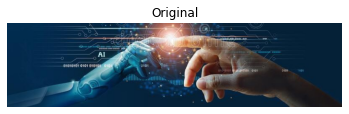

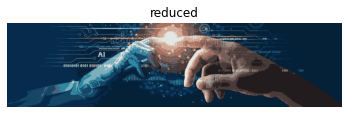

In [32]:
plt.figure(1)
plt.axis('off')
plt.title("Original")
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title("reduced")
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()